In [6]:
import draftAnal as DA
import os

DA.resetFolder("./Data/WORKING")

In [7]:
import matplotlib.pyplot as plt
from datetime import datetime as dt
import pandas as pd
import numpy as np
import pickle as pk

In [8]:
def plot_sliding_prop(Data, prop):
    x = np.linspace(0, 5, 100)
    cmap = plt.get_cmap('jet')
    fig = plt.figure(figsize=(14,6))
    ax = fig.add_axes([1,1,1,1])
    N = len(Data)
    for i,author in enumerate(Data):
        color = cmap(float(i)/N)
        plot_df = pd.DataFrame()
        x = [dt.strptime(draft.tag, '%d_%m_%H_%M') for draft in author.drafts]
        sliding_avg = [float(getattr(draft.sliding,prop)) for draft in author.drafts]
        plot_df['x']  = x
        plot_df['y'] = sliding_avg
        plot_df.sort_values(by='x')
        plot_df.reset_index()
        plot_df['Edit_norm'] = plot_df.index/plot_df.index.max()
        plot_df.plot(ax =ax,x='Edit_norm',y='y',c=color, label=author.name)
    plt.ylabel(prop)

## Determine Composition of the Data from INPUT folder

In [9]:
Data = []

for i, directory in enumerate(next(os.walk('./Data/INPUT/'))[1]):
    Data.append(DA.author(directory.lower()))

COLLIAUX
LORETO
UBALDI
MONECHI
BENTKOWSKI
PULLANO
AOUAMEUR
VANTRIJP
GRAVINO
TANI
COLIZZA
POLETTO
PINOTTI
PETRI
VALDANO
LONDEI
HANAPPE
ROUX
TEMIME


## Clean the filenames in order to be easyer to use in the future

In [10]:
for i, author in enumerate(Data):
    author.cleanfilenames()
    Data[i] = author

## Calculate the cross compressibility within drafts of a same author

In [11]:
for i, author in enumerate(Data):
    author.createContigs()
    Data[i] = author

## Save Data

In [13]:
pk.dump( Data, open( "./Data/OUTPUT/Data_03_09.p", "wb" ) )

In [14]:
Data2 = pk.load( open( "./Data/OUTPUT/Data_03_09.p", "rb" ) )

## Plot the cross compressibility for the last draft in the author work

In [39]:
last_draft = {}
for author in Data:
    time_of_draft = [dt.strptime(str(draft.tag)+'_2019', '%d_%m_%H_%M_%Y') for draft in author.drafts]
    tof_s = sorted(time_of_draft)
    for el in tof_s:
        print(el.strftime('%d_%m_%H_%M'))
    tof_dic = {}
    for i in range(len(tof_s)):
        tof_dic[tof_s[i]] = time_of_draft.index(tof_s[i])
    last_draft[author.name] = tof_dic[tof_s[-1]]
    print(author.name+'\'s last draft is the '+str(last_draft[author.name])+' at '+str(author.drafts[last_draft[author.name]].tag))


30_01_09_36
30_01_09_37
30_01_09_39
30_01_09_40
30_01_09_42
30_01_09_43
30_01_09_44
30_01_09_45
30_01_09_46
30_01_09_48
30_01_09_49
30_01_09_51
30_01_09_52
30_01_09_54
30_01_09_55
30_01_09_56
30_01_09_57
30_01_09_58
30_01_09_59
30_01_10_00
30_01_10_01
30_01_10_02
30_01_10_07
30_01_10_08
30_01_10_11
30_01_10_12
30_01_10_13
30_01_10_14
30_01_10_15
30_01_10_16
30_01_10_17
30_01_10_18
30_01_10_19
30_01_10_20
30_01_10_23
30_01_10_25
30_01_10_29
30_01_10_30
30_01_10_31
30_01_10_32
30_01_10_34
30_01_10_35
30_01_10_36
30_01_10_37
30_01_10_46
30_01_10_48
30_01_10_49
30_01_10_50
30_01_10_52
30_01_10_53
30_01_10_55
30_01_10_56
30_01_10_57
30_01_10_58
30_01_17_04
30_01_17_05
30_01_17_08
30_01_17_10
30_01_17_11
30_01_17_12
30_01_17_13
30_01_17_14
30_01_17_23
30_01_17_24
30_01_17_26
30_01_17_27
30_01_17_28
30_01_17_30
30_01_17_33
30_01_17_34
30_01_17_35
30_01_17_36
30_01_17_37
30_01_17_38
30_01_17_39
30_01_17_40
30_01_17_41
30_01_17_44
30_01_17_46
30_01_17_47
30_01_17_48
30_01_17_51
30_01_17_52
30_0

30_01_17_20
30_01_17_22
30_01_17_23
30_01_17_25
30_01_17_26
30_01_17_27
30_01_17_28
30_01_17_29
30_01_17_30
30_01_17_31
30_01_17_32
30_01_17_33
30_01_17_35
30_01_17_36
30_01_17_37
30_01_17_38
30_01_17_39
30_01_17_40
30_01_17_41
30_01_17_42
30_01_17_43
30_01_17_46
30_01_17_47
30_01_17_48
30_01_17_49
30_01_17_50
30_01_17_55
30_01_17_56
30_01_17_57
30_01_17_58
30_01_17_59
30_01_18_00
30_01_18_02
30_01_18_04
30_01_18_05
30_01_18_06
31_01_10_27
31_01_10_28
31_01_10_29
31_01_10_30
31_01_10_31
31_01_10_34
31_01_10_35
31_01_10_37
31_01_10_38
31_01_10_39
31_01_10_40
31_01_10_41
31_01_10_42
31_01_10_45
31_01_10_46
31_01_10_50
31_01_10_51
31_01_10_52
31_01_10_53
31_01_10_54
31_01_10_55
31_01_10_56
31_01_10_57
31_01_10_58
31_01_10_59
31_01_11_00
31_01_11_02
31_01_11_03
31_01_11_04
31_01_11_05
31_01_11_35
31_01_11_36
31_01_11_37
31_01_11_38
31_01_11_39
31_01_11_40
31_01_11_41
31_01_11_42
31_01_11_43
31_01_11_45
31_01_11_47
31_01_11_48
31_01_11_49
31_01_11_50
31_01_11_51
31_01_11_52
31_01_11_53
31_0

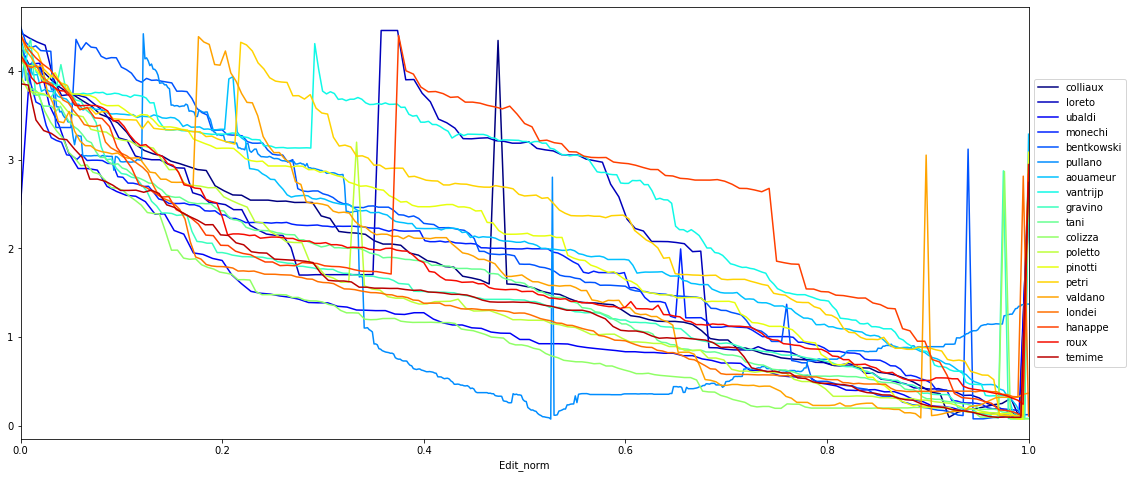

In [21]:
x = np.linspace(0, 5, 100)
cmap = plt.get_cmap('jet')
fig = plt.figure(figsize=(14,6))
ax = fig.add_axes([1,1,1,1])
N = len(Data)
for i,author in enumerate(Data):
    color = cmap(float(i)/N)
    author.drafts[last_draft[author.name]].contigData.plot(ax = ax, x='Edit_norm', y='distance', c=color, label=author.name)
    ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.savefig('LastDraftCE.png', bbox_inches='tight',format='png')

In [32]:
Data[5].drafts[last_draft['pullano']].tag

'31_01_16_15'

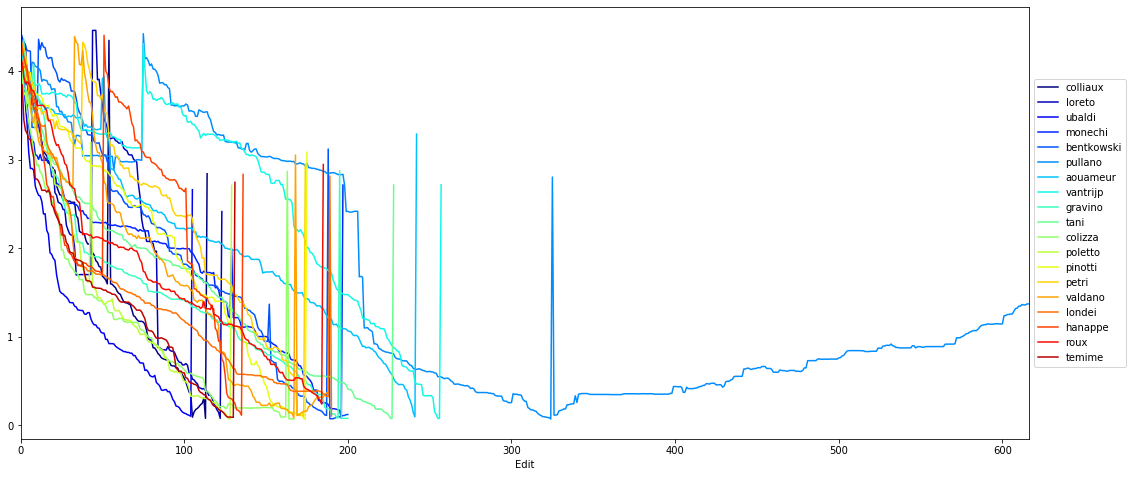

In [23]:
x = np.linspace(0, 5, 100)
cmap = plt.get_cmap('jet')
fig = plt.figure(figsize=(14,6))
ax = fig.add_axes([1,1,1,1])
N = len(Data)
for i,author in enumerate(Data):
    color = cmap(float(i)/N)
    author.drafts[last_draft[author.name]].contigData.plot(ax = ax, x='Edit', y='distance', c=color, label=author.name)
    ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.savefig('LastDraftCErealTime.png', bbox_inches='tight',format='png')

## Compute the cross compressibility within the drafts (100 character sliding windows)

In [7]:
for i, author in enumerate(Data):
    print(author.name)
    author.slide()
    Data[i] = author

colliaux
bash runningWindow.sh ./Data/WORKING/COLLIAUX/START/Copy_of_SEW1_COLLIAUX_4_-_31_January__15_35
bash runningWindow.sh ./Data/WORKING/COLLIAUX/START/Copy_of_SEW1_COLLIAUX_1_-_30_January__09_55
bash runningWindow.sh ./Data/WORKING/COLLIAUX/START/Copy_of_SEW1_COLLIAUX_1_-_30_January__09_52
bash runningWindow.sh ./Data/WORKING/COLLIAUX/START/Copy_of_SEW1_COLLIAUX_3_-_31_January__10_58
bash runningWindow.sh ./Data/WORKING/COLLIAUX/START/Copy_of_SEW1_COLLIAUX_1_-_30_January__09_37
bash runningWindow.sh ./Data/WORKING/COLLIAUX/START/Copy_of_SEW1_COLLIAUX_3_-_31_January__14_50
bash runningWindow.sh ./Data/WORKING/COLLIAUX/START/Copy_of_SEW1_COLLIAUX_1_-_30_January__09_39
bash runningWindow.sh ./Data/WORKING/COLLIAUX/START/Copy_of_SEW1_COLLIAUX_3_-_31_January__10_56
bash runningWindow.sh ./Data/WORKING/COLLIAUX/START/Copy_of_SEW1_COLLIAUX_3_-_31_January__10_51
bash runningWindow.sh ./Data/WORKING/COLLIAUX/START/Copy_of_SEW1_COLLIAUX_1_-_30_January__09_54
bash runningWindow.sh ./Data/WO

bash runningWindow.sh ./Data/WORKING/COLLIAUX/START/Copy_of_SEW1_COLLIAUX_1_-_30_January__10_49
bash runningWindow.sh ./Data/WORKING/COLLIAUX/START/Copy_of_SEW1_COLLIAUX_2_-_30_January__17_05
bash runningWindow.sh ./Data/WORKING/COLLIAUX/START/Copy_of_SEW1_COLLIAUX_2_-_30_January__17_33
bash runningWindow.sh ./Data/WORKING/COLLIAUX/START/Copy_of_SEW1_COLLIAUX_2_-_30_January__17_34
bash runningWindow.sh ./Data/WORKING/COLLIAUX/START/Copy_of_SEW1_COLLIAUX_1_-_30_January__10_13
bash runningWindow.sh ./Data/WORKING/COLLIAUX/START/Copy_of_SEW1_COLLIAUX_1_-_30_January__10_14
bash runningWindow.sh ./Data/WORKING/COLLIAUX/START/Copy_of_SEW1_COLLIAUX_2_-_30_January__17_51
bash runningWindow.sh ./Data/WORKING/COLLIAUX/START/Copy_of_SEW1_COLLIAUX_2_-_30_January__17_56
bash runningWindow.sh ./Data/WORKING/COLLIAUX/START/Copy_of_SEW1_COLLIAUX_1_-_30_January__10_25
bash runningWindow.sh ./Data/WORKING/COLLIAUX/START/Copy_of_SEW1_COLLIAUX_1_-_30_January__10_46
bash runningWindow.sh ./Data/WORKING/COL

bash runningWindow.sh ./Data/WORKING/LORETO/START/Copy_of_SEW1_LORETO_1_-_30_January__11_09
bash runningWindow.sh ./Data/WORKING/LORETO/START/Copy_of_SEW1_LORETO_3_-_31_January__10_55
bash runningWindow.sh ./Data/WORKING/LORETO/START/Copy_of_SEW1_LORETO_1_-_30_January__09_51
bash runningWindow.sh ./Data/WORKING/LORETO/START/Copy_of_SEW1_LORETO_1_-_30_January__09_58
bash runningWindow.sh ./Data/WORKING/LORETO/START/Copy_of_SEW1_LORETO_1_-_30_January__09_46
bash runningWindow.sh ./Data/WORKING/LORETO/START/Copy_of_SEW1_LORETO_1_-_30_January__09_48
bash runningWindow.sh ./Data/WORKING/LORETO/START/Copy_of_SEW1_LORETO_1_-_30_January__11_11
bash runningWindow.sh ./Data/WORKING/LORETO/START/Copy_of_SEW1_LORETO_1_-_30_January__09_47
bash runningWindow.sh ./Data/WORKING/LORETO/START/Copy_of_SEW1_LORETO_1_-_30_January__09_40
bash runningWindow.sh ./Data/WORKING/LORETO/START/Copy_of_SEW1_LORETO_2_-_30_January__17_53
bash runningWindow.sh ./Data/WORKING/LORETO/START/Copy_of_SEW1_LORETO_3_-_31_Jan

bash runningWindow.sh ./Data/WORKING/UBALDI/START/Copy_of_SEW1_UBALDI_3_-_31_January__10_24
bash runningWindow.sh ./Data/WORKING/UBALDI/START/Copy_of_SEW1_UBALDI_3_-_31_January__10_23
bash runningWindow.sh ./Data/WORKING/UBALDI/START/Copy_of_SEW1_UBALDI_4_-_31_January__15_31
bash runningWindow.sh ./Data/WORKING/UBALDI/START/Copy_of_SEW1_UBALDI_3_-_31_January__10_30
bash runningWindow.sh ./Data/WORKING/UBALDI/START/Copy_of_SEW1_UBALDI_4_-_31_January__15_00
bash runningWindow.sh ./Data/WORKING/UBALDI/START/Copy_of_SEW1_UBALDI_4_-_31_January__15_38
bash runningWindow.sh ./Data/WORKING/UBALDI/START/Copy_of_SEW1_UBALDI_3_-_31_January__10_52
bash runningWindow.sh ./Data/WORKING/UBALDI/START/Copy_of_SEW1_UBALDI_4_-_31_January__15_06
bash runningWindow.sh ./Data/WORKING/UBALDI/START/Copy_of_SEW1_UBALDI_4_-_31_January__15_39
bash runningWindow.sh ./Data/WORKING/UBALDI/START/Copy_of_SEW1_UBALDI_4_-_31_January__15_01
bash runningWindow.sh ./Data/WORKING/UBALDI/START/Copy_of_SEW1_UBALDI_3_-_31_Jan

bash runningWindow.sh ./Data/WORKING/MONECHI/START/Copy_of_SEW1_MONECHI_4_-_31_January__14_51
bash runningWindow.sh ./Data/WORKING/MONECHI/START/Copy_of_SEW1_MONECHI_2_-_31_January__11_04
bash runningWindow.sh ./Data/WORKING/MONECHI/START/Copy_of_SEW1_MONECHI_2_-_30_January__17_49
bash runningWindow.sh ./Data/WORKING/MONECHI/START/Copy_of_SEW1_MONECHI_2_-_30_January__18_01
bash runningWindow.sh ./Data/WORKING/MONECHI/START/Copy_of_SEW1_MONECHI_4_-_31_January__14_56
bash runningWindow.sh ./Data/WORKING/MONECHI/START/Copy_of_SEW1_MONECHI_1_-_30_January__10_02
bash runningWindow.sh ./Data/WORKING/MONECHI/START/Copy_of_SEW1_MONECHI_3_-_31_January__11_59
bash runningWindow.sh ./Data/WORKING/MONECHI/START/Copy_of_SEW1_MONECHI_2_-_30_January__17_12
bash runningWindow.sh ./Data/WORKING/MONECHI/START/Copy_of_SEW1_MONECHI_1_-_30_January__10_59
bash runningWindow.sh ./Data/WORKING/MONECHI/START/Copy_of_SEW1_MONECHI_2_-_30_January__17_24
bash runningWindow.sh ./Data/WORKING/MONECHI/START/Copy_of_S

bash runningWindow.sh ./Data/WORKING/MONECHI/START/Copy_of_SEW1_MONECHI_1_-_30_January__10_30
bash runningWindow.sh ./Data/WORKING/MONECHI/START/Copy_of_SEW1_MONECHI_3_-_31_January__11_54
bash runningWindow.sh ./Data/WORKING/MONECHI/START/Copy_of_SEW1_MONECHI_2_-_30_January__17_43
bash runningWindow.sh ./Data/WORKING/MONECHI/START/Copy_of_SEW1_MONECHI_2_-_30_January__17_44
bash runningWindow.sh ./Data/WORKING/MONECHI/START/Copy_of_SEW1_MONECHI_1_-_30_January__10_08
bash runningWindow.sh ./Data/WORKING/MONECHI/START/Copy_of_SEW1_MONECHI_2_-_31_January__11_00
bash runningWindow.sh ./Data/WORKING/MONECHI/START/Copy_of_SEW1_MONECHI_4_-_31_January__14_55
bash runningWindow.sh ./Data/WORKING/MONECHI/START/Copy_of_SEW1_MONECHI_1_-_30_January__10_01
bash runningWindow.sh ./Data/WORKING/MONECHI/START/Copy_of_SEW1_MONECHI_1_-_30_January__10_06
bash runningWindow.sh ./Data/WORKING/MONECHI/START/Copy_of_SEW1_MONECHI_4_-_31_January__14_52
bash runningWindow.sh ./Data/WORKING/MONECHI/START/Copy_of_S

bash runningWindow.sh ./Data/WORKING/MONECHI/START/Copy_of_SEW1_MONECHI_2_-_30_January__17_32
bash runningWindow.sh ./Data/WORKING/MONECHI/START/Copy_of_SEW1_MONECHI_3_-_31_January__12_02
bash runningWindow.sh ./Data/WORKING/MONECHI/START/Copy_of_SEW1_MONECHI_1_-_30_January__10_41
bash runningWindow.sh ./Data/WORKING/MONECHI/START/Copy_of_SEW1_MONECHI_2_-_30_January__17_04
bash runningWindow.sh ./Data/WORKING/MONECHI/START/Copy_of_SEW1_MONECHI_1_-_30_January__10_48
bash runningWindow.sh ./Data/WORKING/MONECHI/START/Copy_of_SEW1_MONECHI_2_-_30_January__17_03
bash runningWindow.sh ./Data/WORKING/MONECHI/START/Copy_of_SEW1_MONECHI_2_-_30_January__17_57
bash runningWindow.sh ./Data/WORKING/MONECHI/START/Copy_of_SEW1_MONECHI_4_-_31_January__14_48
bash runningWindow.sh ./Data/WORKING/MONECHI/START/Copy_of_SEW1_MONECHI_2_-_30_January__17_50
bash runningWindow.sh ./Data/WORKING/MONECHI/START/Copy_of_SEW1_MONECHI_3_-_31_January__11_47
bash runningWindow.sh ./Data/WORKING/MONECHI/START/Copy_of_S

bash runningWindow.sh ./Data/WORKING/BENTKOWSKI/START/Copy_of_SEW1_BENTKOWSKI_2_-_30_January__17_07
bash runningWindow.sh ./Data/WORKING/BENTKOWSKI/START/Copy_of_SEW1_BENTKOWSKI_3_-_31_January__11_42
bash runningWindow.sh ./Data/WORKING/BENTKOWSKI/START/Copy_of_SEW1_BENTKOWSKI_2_-_30_January__17_55
bash runningWindow.sh ./Data/WORKING/BENTKOWSKI/START/Copy_of_SEW1_BENTKOWSKI_3_-_31_January__12_09
bash runningWindow.sh ./Data/WORKING/BENTKOWSKI/START/Copy_of_SEW1_BENTKOWSKI_2_-_30_January__17_06
bash runningWindow.sh ./Data/WORKING/BENTKOWSKI/START/Copy_of_SEW1_BENTKOWSKI_3_-_31_January__15_17
bash runningWindow.sh ./Data/WORKING/BENTKOWSKI/START/Copy_of_SEW1_BENTKOWSKI_3_-_31_January__12_00
bash runningWindow.sh ./Data/WORKING/BENTKOWSKI/START/Copy_of_SEW1_BENTKOWSKI_4_-_1_February__01_35
bash runningWindow.sh ./Data/WORKING/BENTKOWSKI/START/Copy_of_SEW1_BENTKOWSKI_2_-_30_January__17_08
bash runningWindow.sh ./Data/WORKING/BENTKOWSKI/START/Copy_of_SEW1_BENTKOWSKI_2_-_30_January__17_37


bash runningWindow.sh ./Data/WORKING/BENTKOWSKI/START/Copy_of_SEW1_BENTKOWSKI_2_-_30_January__17_26
bash runningWindow.sh ./Data/WORKING/BENTKOWSKI/START/Copy_of_SEW1_BENTKOWSKI_2_-_30_January__17_19
bash runningWindow.sh ./Data/WORKING/BENTKOWSKI/START/Copy_of_SEW1_BENTKOWSKI_2_-_30_January__17_21
bash runningWindow.sh ./Data/WORKING/BENTKOWSKI/START/Copy_of_SEW1_BENTKOWSKI_3_-_31_January__15_06
bash runningWindow.sh ./Data/WORKING/BENTKOWSKI/START/Copy_of_SEW1_BENTKOWSKI_3_-_31_January__11_36
bash runningWindow.sh ./Data/WORKING/BENTKOWSKI/START/Copy_of_SEW1_BENTKOWSKI_2_-_30_January__17_17
bash runningWindow.sh ./Data/WORKING/BENTKOWSKI/START/Copy_of_SEW1_BENTKOWSKI_3_-_31_January__11_00
bash runningWindow.sh ./Data/WORKING/BENTKOWSKI/START/Copy_of_SEW1_BENTKOWSKI_2_-_30_January__17_28
bash runningWindow.sh ./Data/WORKING/BENTKOWSKI/START/Copy_of_SEW1_BENTKOWSKI_3_-_31_January__12_18
bash runningWindow.sh ./Data/WORKING/BENTKOWSKI/START/Copy_of_SEW1_BENTKOWSKI_2_-_30_January__17_10


bash runningWindow.sh ./Data/WORKING/PULLANO/START/Copy_of_SEW1_PULLANO_2_-_31_January__00_31
bash runningWindow.sh ./Data/WORKING/PULLANO/START/Copy_of_SEW1_PULLANO_4_-_1_February__17_51
bash runningWindow.sh ./Data/WORKING/PULLANO/START/Copy_of_SEW1_PULLANO_4_-_31_January__15_30
bash runningWindow.sh ./Data/WORKING/PULLANO/START/Copy_of_SEW1_PULLANO_3_-_31_January__14_30
bash runningWindow.sh ./Data/WORKING/PULLANO/START/Copy_of_SEW1_PULLANO_4_-_31_January__15_08
bash runningWindow.sh ./Data/WORKING/PULLANO/START/Copy_of_SEW1_PULLANO_1_-_30_January__09_57
bash runningWindow.sh ./Data/WORKING/PULLANO/START/Copy_of_SEW1_PULLANO_3_-_31_January__10_38
bash runningWindow.sh ./Data/WORKING/PULLANO/START/Copy_of_SEW1_PULLANO_4_-_1_February__18_21
bash runningWindow.sh ./Data/WORKING/PULLANO/START/Copy_of_SEW1_PULLANO_4_-_31_January__15_37
bash runningWindow.sh ./Data/WORKING/PULLANO/START/Copy_of_SEW1_PULLANO_4_-_1_February__17_56
bash runningWindow.sh ./Data/WORKING/PULLANO/START/Copy_of_S

bash runningWindow.sh ./Data/WORKING/PULLANO/START/Copy_of_SEW1_PULLANO_4_-_1_February__12_56
bash runningWindow.sh ./Data/WORKING/PULLANO/START/Copy_of_SEW1_PULLANO_3_-_31_January__12_10
bash runningWindow.sh ./Data/WORKING/PULLANO/START/Copy_of_SEW1_PULLANO_4_-_1_February__15_41
bash runningWindow.sh ./Data/WORKING/PULLANO/START/Copy_of_SEW1_PULLANO_2_-_31_January__01_06
bash runningWindow.sh ./Data/WORKING/PULLANO/START/Copy_of_SEW1_PULLANO_1_-_30_January__10_53
bash runningWindow.sh ./Data/WORKING/PULLANO/START/Copy_of_SEW1_PULLANO_4_-_1_February__19_16
bash runningWindow.sh ./Data/WORKING/PULLANO/START/Copy_of_SEW1_PULLANO_3_-_31_January__12_28
bash runningWindow.sh ./Data/WORKING/PULLANO/START/Copy_of_SEW1_PULLANO_2_-_30_January__17_18
bash runningWindow.sh ./Data/WORKING/PULLANO/START/Copy_of_SEW1_PULLANO_1_-_30_January__10_54
bash runningWindow.sh ./Data/WORKING/PULLANO/START/Copy_of_SEW1_PULLANO_2_-_31_January__01_01
bash runningWindow.sh ./Data/WORKING/PULLANO/START/Copy_of_S

bash runningWindow.sh ./Data/WORKING/PULLANO/START/Copy_of_SEW1_PULLANO_2_-_30_January__17_33
bash runningWindow.sh ./Data/WORKING/PULLANO/START/Copy_of_SEW1_PULLANO_3_-_31_January__12_03
bash runningWindow.sh ./Data/WORKING/PULLANO/START/Copy_of_SEW1_PULLANO_4_-_1_February__15_52
bash runningWindow.sh ./Data/WORKING/PULLANO/START/Copy_of_SEW1_PULLANO_4_-_1_February__19_02
bash runningWindow.sh ./Data/WORKING/PULLANO/START/Copy_of_SEW1_PULLANO_2_-_31_January__01_23
bash runningWindow.sh ./Data/WORKING/PULLANO/START/Copy_of_SEW1_PULLANO_4_-_1_February__11_54
bash runningWindow.sh ./Data/WORKING/PULLANO/START/Copy_of_SEW1_PULLANO_4_-_1_February__19_34
bash runningWindow.sh ./Data/WORKING/PULLANO/START/Copy_of_SEW1_PULLANO_2_-_31_January__01_24
bash runningWindow.sh ./Data/WORKING/PULLANO/START/Copy_of_SEW1_PULLANO_4_-_1_February__19_33
bash runningWindow.sh ./Data/WORKING/PULLANO/START/Copy_of_SEW1_PULLANO_3_-_31_January__11_49
bash runningWindow.sh ./Data/WORKING/PULLANO/START/Copy_of_S

bash runningWindow.sh ./Data/WORKING/PULLANO/START/Copy_of_SEW1_PULLANO_4_-_1_February__13_29
bash runningWindow.sh ./Data/WORKING/PULLANO/START/Copy_of_SEW1_PULLANO_3_-_31_January__10_48
bash runningWindow.sh ./Data/WORKING/PULLANO/START/Copy_of_SEW1_PULLANO_4_-_1_February__18_51
bash runningWindow.sh ./Data/WORKING/PULLANO/START/Copy_of_SEW1_PULLANO_2_-_31_January__00_46
bash runningWindow.sh ./Data/WORKING/PULLANO/START/Copy_of_SEW1_PULLANO_4_-_1_February__18_05
bash runningWindow.sh ./Data/WORKING/PULLANO/START/Copy_of_SEW1_PULLANO_4_-_1_February__18_02
bash runningWindow.sh ./Data/WORKING/PULLANO/START/Copy_of_SEW1_PULLANO_4_-_1_February__18_34
bash runningWindow.sh ./Data/WORKING/PULLANO/START/Copy_of_SEW1_PULLANO_4_-_31_January__15_25
bash runningWindow.sh ./Data/WORKING/PULLANO/START/Copy_of_SEW1_PULLANO_4_-_1_February__10_53
bash runningWindow.sh ./Data/WORKING/PULLANO/START/Copy_of_SEW1_PULLANO_4_-_1_February__17_44
bash runningWindow.sh ./Data/WORKING/PULLANO/START/Copy_of_S

bash runningWindow.sh ./Data/WORKING/PULLANO/START/Copy_of_SEW1_PULLANO_2_-_30_January__18_01
bash runningWindow.sh ./Data/WORKING/PULLANO/START/Copy_of_SEW1_PULLANO_4_-_1_February__15_28
bash runningWindow.sh ./Data/WORKING/PULLANO/START/Copy_of_SEW1_PULLANO_4_-_1_February__11_11
bash runningWindow.sh ./Data/WORKING/PULLANO/START/Copy_of_SEW1_PULLANO_2_-_30_January__17_40
bash runningWindow.sh ./Data/WORKING/PULLANO/START/Copy_of_SEW1_PULLANO_2_-_30_January__18_08
bash runningWindow.sh ./Data/WORKING/PULLANO/START/Copy_of_SEW1_PULLANO_4_-_1_February__15_21
bash runningWindow.sh ./Data/WORKING/PULLANO/START/Copy_of_SEW1_PULLANO_4_-_1_February__12_36
bash runningWindow.sh ./Data/WORKING/PULLANO/START/Copy_of_SEW1_PULLANO_4_-_1_February__12_09
bash runningWindow.sh ./Data/WORKING/PULLANO/START/Copy_of_SEW1_PULLANO_2_-_30_January__17_47
bash runningWindow.sh ./Data/WORKING/PULLANO/START/Copy_of_SEW1_PULLANO_4_-_1_February__11_16
bash runningWindow.sh ./Data/WORKING/PULLANO/START/Copy_of_S

bash runningWindow.sh ./Data/WORKING/PULLANO/START/Copy_of_SEW1_PULLANO_1_-_30_January__10_44
bash runningWindow.sh ./Data/WORKING/PULLANO/START/Copy_of_SEW1_PULLANO_2_-_30_January__17_08
bash runningWindow.sh ./Data/WORKING/PULLANO/START/Copy_of_SEW1_PULLANO_4_-_1_February__19_06
bash runningWindow.sh ./Data/WORKING/PULLANO/START/Copy_of_SEW1_PULLANO_4_-_1_February__11_59
bash runningWindow.sh ./Data/WORKING/PULLANO/START/Copy_of_SEW1_PULLANO_4_-_1_February__12_48
bash runningWindow.sh ./Data/WORKING/PULLANO/START/Copy_of_SEW1_PULLANO_4_-_1_February__19_30
bash runningWindow.sh ./Data/WORKING/PULLANO/START/Copy_of_SEW1_PULLANO_2_-_31_January__01_18
bash runningWindow.sh ./Data/WORKING/PULLANO/START/Copy_of_SEW1_PULLANO_4_-_1_February__19_08
bash runningWindow.sh ./Data/WORKING/PULLANO/START/Copy_of_SEW1_PULLANO_4_-_1_February__11_57
bash runningWindow.sh ./Data/WORKING/PULLANO/START/Copy_of_SEW1_PULLANO_2_-_31_January__01_20
bash runningWindow.sh ./Data/WORKING/PULLANO/START/Copy_of_S

bash runningWindow.sh ./Data/WORKING/PULLANO/START/Copy_of_SEW1_PULLANO_4_-_31_January__15_27
bash runningWindow.sh ./Data/WORKING/PULLANO/START/Copy_of_SEW1_PULLANO_4_-_1_February__18_31
bash runningWindow.sh ./Data/WORKING/PULLANO/START/Copy_of_SEW1_PULLANO_2_-_31_January__00_19
bash runningWindow.sh ./Data/WORKING/PULLANO/START/Copy_of_SEW1_PULLANO_4_-_31_January__15_18
bash runningWindow.sh ./Data/WORKING/PULLANO/START/Copy_of_SEW1_PULLANO_4_-_1_February__18_38
bash runningWindow.sh ./Data/WORKING/PULLANO/START/Copy_of_SEW1_PULLANO_4_-_31_January__15_11
bash runningWindow.sh ./Data/WORKING/PULLANO/START/Copy_of_SEW1_PULLANO_1_-_30_January__09_49
bash runningWindow.sh ./Data/WORKING/PULLANO/START/Copy_of_SEW1_PULLANO_2_-_31_January__00_17
bash runningWindow.sh ./Data/WORKING/PULLANO/START/Copy_of_SEW1_PULLANO_4_-_31_January__15_29
bash runningWindow.sh ./Data/WORKING/PULLANO/START/Copy_of_SEW1_PULLANO_3_-_31_January__14_29
bash runningWindow.sh ./Data/WORKING/PULLANO/START/Copy_of_S

bash runningWindow.sh ./Data/WORKING/AOUAMEUR/START/Copy_of_SEW1_AOUAMEUR_2_-_30_January__17_45
bash runningWindow.sh ./Data/WORKING/AOUAMEUR/START/Copy_of_SEW1_AOUAMEUR_3_-_31_January__11_52
bash runningWindow.sh ./Data/WORKING/AOUAMEUR/START/Copy_of_SEW1_AOUAMEUR_1_-_30_January__10_09
bash runningWindow.sh ./Data/WORKING/AOUAMEUR/START/Copy_of_SEW1_AOUAMEUR_4_-_31_January__14_54
bash runningWindow.sh ./Data/WORKING/AOUAMEUR/START/Copy_of_SEW1_AOUAMEUR_1_-_30_January__10_00
bash runningWindow.sh ./Data/WORKING/AOUAMEUR/START/Copy_of_SEW1_AOUAMEUR_2_-_30_January__18_04
bash runningWindow.sh ./Data/WORKING/AOUAMEUR/START/Copy_of_SEW1_AOUAMEUR_1_-_30_January__10_07
bash runningWindow.sh ./Data/WORKING/AOUAMEUR/START/Copy_of_SEW1_AOUAMEUR_1_-_30_January__10_38
bash runningWindow.sh ./Data/WORKING/AOUAMEUR/START/Copy_of_SEW1_AOUAMEUR_4_-_31_January__15_00
bash runningWindow.sh ./Data/WORKING/AOUAMEUR/START/Copy_of_SEW1_AOUAMEUR_1_-_30_January__09_56
bash runningWindow.sh ./Data/WORKING/AOU

bash runningWindow.sh ./Data/WORKING/AOUAMEUR/START/Copy_of_SEW1_AOUAMEUR_4_-_31_January__14_56
bash runningWindow.sh ./Data/WORKING/AOUAMEUR/START/Copy_of_SEW1_AOUAMEUR_3_-_31_January__11_59
bash runningWindow.sh ./Data/WORKING/AOUAMEUR/START/Copy_of_SEW1_AOUAMEUR_2_-_30_January__18_06
bash runningWindow.sh ./Data/WORKING/AOUAMEUR/START/Copy_of_SEW1_AOUAMEUR_4_-_31_January__14_51
bash runningWindow.sh ./Data/WORKING/AOUAMEUR/START/Copy_of_SEW1_AOUAMEUR_1_-_30_January__10_05
bash runningWindow.sh ./Data/WORKING/AOUAMEUR/START/Copy_of_SEW1_AOUAMEUR_2_-_30_January__17_40
bash runningWindow.sh ./Data/WORKING/AOUAMEUR/START/Copy_of_SEW1_AOUAMEUR_2_-_30_January__18_08
bash runningWindow.sh ./Data/WORKING/AOUAMEUR/START/Copy_of_SEW1_AOUAMEUR_1_-_30_January__10_33
bash runningWindow.sh ./Data/WORKING/AOUAMEUR/START/Copy_of_SEW1_AOUAMEUR_3_-_31_January__11_57
bash runningWindow.sh ./Data/WORKING/AOUAMEUR/START/Copy_of_SEW1_AOUAMEUR_4_-_31_January__14_58
bash runningWindow.sh ./Data/WORKING/AOU

bash runningWindow.sh ./Data/WORKING/AOUAMEUR/START/Copy_of_SEW1_AOUAMEUR_4_-_31_January__16_08
bash runningWindow.sh ./Data/WORKING/AOUAMEUR/START/Copy_of_SEW1_AOUAMEUR_4_-_31_January__16_01
bash runningWindow.sh ./Data/WORKING/AOUAMEUR/START/Copy_of_SEW1_AOUAMEUR_4_-_31_January__15_26
bash runningWindow.sh ./Data/WORKING/AOUAMEUR/START/Copy_of_SEW1_AOUAMEUR_4_-_31_January__15_21
bash runningWindow.sh ./Data/WORKING/AOUAMEUR/START/Copy_of_SEW1_AOUAMEUR_4_-_31_January__16_06
bash runningWindow.sh ./Data/WORKING/AOUAMEUR/START/Copy_of_SEW1_AOUAMEUR_3_-_31_January__10_45
bash runningWindow.sh ./Data/WORKING/AOUAMEUR/START/Copy_of_SEW1_AOUAMEUR_4_-_31_January__15_44
bash runningWindow.sh ./Data/WORKING/AOUAMEUR/START/Copy_of_SEW1_AOUAMEUR_4_-_31_January__15_43
bash runningWindow.sh ./Data/WORKING/AOUAMEUR/START/Copy_of_SEW1_AOUAMEUR_2_-_30_January__17_30
bash runningWindow.sh ./Data/WORKING/AOUAMEUR/START/Copy_of_SEW1_AOUAMEUR_3_-_31_January__12_00
bash runningWindow.sh ./Data/WORKING/AOU

bash runningWindow.sh ./Data/WORKING/VANTRIJP/START/Copy_of_SEW1_VANTRIJP_4_-_31_January__15_42
bash runningWindow.sh ./Data/WORKING/VANTRIJP/START/Copy_of_SEW1_VANTRIJP_1_-_30_January__09_49
bash runningWindow.sh ./Data/WORKING/VANTRIJP/START/Copy_of_SEW1_VANTRIJP_4_-_31_January__15_29
bash runningWindow.sh ./Data/WORKING/VANTRIJP/START/Copy_of_SEW1_VANTRIJP_3_-_31_January__10_17
bash runningWindow.sh ./Data/WORKING/VANTRIJP/START/Copy_of_SEW1_VANTRIJP_1_-_30_January__09_47
bash runningWindow.sh ./Data/WORKING/VANTRIJP/START/Copy_of_SEW1_VANTRIJP_4_-_31_January__15_18
bash runningWindow.sh ./Data/WORKING/VANTRIJP/START/Copy_of_SEW1_VANTRIJP_3_-_31_January__10_10
bash runningWindow.sh ./Data/WORKING/VANTRIJP/START/Copy_of_SEW1_VANTRIJP_4_-_31_January__15_20
bash runningWindow.sh ./Data/WORKING/VANTRIJP/START/Copy_of_SEW1_VANTRIJP_1_-_30_January__09_40
bash runningWindow.sh ./Data/WORKING/VANTRIJP/START/Copy_of_SEW1_VANTRIJP_1_-_30_January__12_30
bash runningWindow.sh ./Data/WORKING/VAN

bash runningWindow.sh ./Data/WORKING/VANTRIJP/START/Copy_of_SEW1_VANTRIJP_3_-_31_January__12_04
bash runningWindow.sh ./Data/WORKING/VANTRIJP/START/Copy_of_SEW1_VANTRIJP_3_-_31_January__11_48
bash runningWindow.sh ./Data/WORKING/VANTRIJP/START/Copy_of_SEW1_VANTRIJP_1_-_30_January__10_13
bash runningWindow.sh ./Data/WORKING/VANTRIJP/START/Copy_of_SEW1_VANTRIJP_1_-_30_January__14_23
bash runningWindow.sh ./Data/WORKING/VANTRIJP/START/Copy_of_SEW1_VANTRIJP_2_-_30_January__17_58
bash runningWindow.sh ./Data/WORKING/VANTRIJP/START/Copy_of_SEW1_VANTRIJP_4_-_31_January__14_40
bash runningWindow.sh ./Data/WORKING/VANTRIJP/START/Copy_of_SEW1_VANTRIJP_1_-_30_January__10_14
bash runningWindow.sh ./Data/WORKING/VANTRIJP/START/Copy_of_SEW1_VANTRIJP_2_-_30_January__17_51
bash runningWindow.sh ./Data/WORKING/VANTRIJP/START/Copy_of_SEW1_VANTRIJP_3_-_31_January__11_46
bash runningWindow.sh ./Data/WORKING/VANTRIJP/START/Copy_of_SEW1_VANTRIJP_3_-_31_January__11_41
bash runningWindow.sh ./Data/WORKING/VAN

bash runningWindow.sh ./Data/WORKING/VANTRIJP/START/Copy_of_SEW1_VANTRIJP_4_-_31_January__14_55
bash runningWindow.sh ./Data/WORKING/VANTRIJP/START/Copy_of_SEW1_VANTRIJP_1_-_30_January__10_06
bash runningWindow.sh ./Data/WORKING/VANTRIJP/START/Copy_of_SEW1_VANTRIJP_2_-_30_January__18_02
bash runningWindow.sh ./Data/WORKING/VANTRIJP/START/Copy_of_SEW1_VANTRIJP_4_-_31_January__14_39
bash runningWindow.sh ./Data/WORKING/VANTRIJP/START/Copy_of_SEW1_VANTRIJP_3_-_31_January__12_11
bash runningWindow.sh ./Data/WORKING/VANTRIJP/START/Copy_of_SEW1_VANTRIJP_2_-_30_January__17_21
bash runningWindow.sh ./Data/WORKING/VANTRIJP/START/Copy_of_SEW1_VANTRIJP_2_-_30_January__17_19
bash runningWindow.sh ./Data/WORKING/VANTRIJP/START/Copy_of_SEW1_VANTRIJP_3_-_31_January__11_31
bash runningWindow.sh ./Data/WORKING/VANTRIJP/START/Copy_of_SEW1_VANTRIJP_2_-_30_January__17_26
bash runningWindow.sh ./Data/WORKING/VANTRIJP/START/Copy_of_SEW1_VANTRIJP_3_-_31_January__12_16
bash runningWindow.sh ./Data/WORKING/VAN

bash runningWindow.sh ./Data/WORKING/GRAVINO/START/Copy_of_SEW1_GRAVINO_3_-_31_January__12_15
bash runningWindow.sh ./Data/WORKING/GRAVINO/START/Copy_of_SEW1_GRAVINO_3_-_31_January__11_04
bash runningWindow.sh ./Data/WORKING/GRAVINO/START/Copy_of_SEW1_GRAVINO_2_-_30_January__17_13
bash runningWindow.sh ./Data/WORKING/GRAVINO/START/Copy_of_SEW1_GRAVINO_2_-_30_January__17_14
bash runningWindow.sh ./Data/WORKING/GRAVINO/START/Copy_of_SEW1_GRAVINO_3_-_31_January__11_03
bash runningWindow.sh ./Data/WORKING/GRAVINO/START/Copy_of_SEW1_GRAVINO_4_-_31_January__14_58
bash runningWindow.sh ./Data/WORKING/GRAVINO/START/Copy_of_SEW1_GRAVINO_2_-_30_January__17_40
bash runningWindow.sh ./Data/WORKING/GRAVINO/START/Copy_of_SEW1_GRAVINO_3_-_31_January__11_57
bash runningWindow.sh ./Data/WORKING/GRAVINO/START/Copy_of_SEW1_GRAVINO_3_-_31_January__11_50
bash runningWindow.sh ./Data/WORKING/GRAVINO/START/Copy_of_SEW1_GRAVINO_1_-_30_January__10_34
bash runningWindow.sh ./Data/WORKING/GRAVINO/START/Copy_of_S

bash runningWindow.sh ./Data/WORKING/GRAVINO/START/Copy_of_SEW1_GRAVINO_1_-_30_January__10_12
bash runningWindow.sh ./Data/WORKING/GRAVINO/START/Copy_of_SEW1_GRAVINO_3_-_31_January__11_49
bash runningWindow.sh ./Data/WORKING/GRAVINO/START/Copy_of_SEW1_GRAVINO_1_-_30_January__10_15
bash runningWindow.sh ./Data/WORKING/GRAVINO/START/Copy_of_SEW1_GRAVINO_2_-_30_January__17_59
bash runningWindow.sh ./Data/WORKING/GRAVINO/START/Copy_of_SEW1_GRAVINO_1_-_30_January__10_08
bash runningWindow.sh ./Data/WORKING/GRAVINO/START/Copy_of_SEW1_GRAVINO_3_-_31_January__11_53
bash runningWindow.sh ./Data/WORKING/GRAVINO/START/Copy_of_SEW1_HANAPPE_1_-_30_January__09_41
bash runningWindow.sh ./Data/WORKING/GRAVINO/START/Copy_of_SEW1_GRAVINO_2_-_30_January__17_43
bash runningWindow.sh ./Data/WORKING/GRAVINO/START/Copy_of_SEW1_GRAVINO_1_-_30_January__10_30
bash runningWindow.sh ./Data/WORKING/GRAVINO/START/Copy_of_SEW1_GRAVINO_3_-_31_January__11_54
bash runningWindow.sh ./Data/WORKING/GRAVINO/START/Copy_of_S

bash runningWindow.sh ./Data/WORKING/TANI/START/Copy_of_SEW1_TANI_2_-_30_January__17_05
bash runningWindow.sh ./Data/WORKING/TANI/START/Copy_of_SEW1_TANI_1_-_30_January__10_49
bash runningWindow.sh ./Data/WORKING/TANI/START/Copy_of_SEW1_TANI_4_-_31_January__14_49
bash runningWindow.sh ./Data/WORKING/TANI/START/Copy_of_SEW1_TANI_3_-_31_January__11_46
bash runningWindow.sh ./Data/WORKING/TANI/START/Copy_of_SEW1_TANI_1_-_30_January__10_22
bash runningWindow.sh ./Data/WORKING/TANI/START/Copy_of_SEW1_TANI_1_-_30_January__10_25
bash runningWindow.sh ./Data/WORKING/TANI/START/Copy_of_SEW1_TANI_3_-_31_January__11_48
bash runningWindow.sh ./Data/WORKING/TANI/START/Copy_of_SEW1_TANI_4_-_31_January__14_47
bash runningWindow.sh ./Data/WORKING/TANI/START/Copy_of_SEW1_TANI_1_-_30_January__10_13
bash runningWindow.sh ./Data/WORKING/TANI/START/Copy_of_SEW1_TANI_2_-_30_January__17_58
bash runningWindow.sh ./Data/WORKING/TANI/START/Copy_of_SEW1_TANI_2_-_30_January__18_10
bash runningWindow.sh ./Data/WOR

bash runningWindow.sh ./Data/WORKING/TANI/START/Copy_of_SEW1_TANI_3_-_31_January__12_16
bash runningWindow.sh ./Data/WORKING/TANI/START/Copy_of_SEW1_TANI_1_-_30_January__10_55
bash runningWindow.sh ./Data/WORKING/TANI/START/Copy_of_SEW1_TANI_4_-_31_January__17_26
bash runningWindow.sh ./Data/WORKING/TANI/START/Copy_of_SEW1_TANI_1_-_30_January__10_11
bash runningWindow.sh ./Data/WORKING/TANI/START/Copy_of_SEW1_TANI_4_-_31_January__14_45
bash runningWindow.sh ./Data/WORKING/TANI/START/Copy_of_SEW1_TANI_2_-_30_January__18_12
bash runningWindow.sh ./Data/WORKING/TANI/START/Copy_of_SEW1_TANI_4_-_31_January__14_42
bash runningWindow.sh ./Data/WORKING/TANI/START/Copy_of_SEW1_TANI_1_-_30_January__10_16
bash runningWindow.sh ./Data/WORKING/TANI/START/Copy_of_SEW1_TANI_1_-_30_January__10_20
bash runningWindow.sh ./Data/WORKING/TANI/START/Copy_of_SEW1_TANI_1_-_30_January__10_18
bash runningWindow.sh ./Data/WORKING/TANI/START/Copy_of_SEW1_TANI_1_-_30_January__10_27
bash runningWindow.sh ./Data/WOR

bash runningWindow.sh ./Data/WORKING/TANI/START/Copy_of_SEW1_TANI_2_-_30_January__17_13
bash runningWindow.sh ./Data/WORKING/TANI/START/Copy_of_SEW1_TANI_3_-_31_January__11_04
bash runningWindow.sh ./Data/WORKING/TANI/START/Copy_of_SEW1_TANI_2_-_30_January__17_25
bash runningWindow.sh ./Data/WORKING/TANI/START/Copy_of_SEW1_TANI_1_-_30_January__10_56
bash runningWindow.sh ./Data/WORKING/TANI/START/Copy_of_SEW1_TANI_3_-_31_January__11_35
bash runningWindow.sh ./Data/WORKING/TANI/START/Copy_of_SEW1_TANI_4_-_31_January__17_22
bash runningWindow.sh ./Data/WORKING/TANI/START/Copy_of_SEW1_TANI_1_-_30_January__10_51
bash runningWindow.sh ./Data/WORKING/TANI/START/Copy_of_SEW1_TANI_3_-_31_January__12_12
bash runningWindow.sh ./Data/WORKING/TANI/START/Copy_of_SEW1_TANI_1_-_30_January__10_05
bash runningWindow.sh ./Data/WORKING/TANI/START/Copy_of_SEW1_TANI_2_-_30_January__18_01
bash runningWindow.sh ./Data/WORKING/TANI/START/Copy_of_SEW1_TANI_2_-_30_January__17_49
bash runningWindow.sh ./Data/WOR

bash runningWindow.sh ./Data/WORKING/COLIZZA/START/Copy_of_SEW1_COLIZZA_4_-_31_January__15_22
bash runningWindow.sh ./Data/WORKING/COLIZZA/START/Copy_of_SEW1_COLIZZA_1_-_30_January__09_42
bash runningWindow.sh ./Data/WORKING/COLIZZA/START/Copy_of_SEW1_COLIZZA_4_-_31_January__15_25
bash runningWindow.sh ./Data/WORKING/COLIZZA/START/Copy_of_SEW1_COLIZZA_1_-_30_January__09_45
bash runningWindow.sh ./Data/WORKING/COLIZZA/START/Copy_of_SEW1_COLIZZA_4_-_31_January__15_40
bash runningWindow.sh ./Data/WORKING/COLIZZA/START/Copy_of_SEW1_COLIZZA_3_-_31_January__10_48
bash runningWindow.sh ./Data/WORKING/COLIZZA/START/Copy_of_SEW1_COLIZZA_4_-_31_January__15_49
bash runningWindow.sh ./Data/WORKING/COLIZZA/START/Copy_of_SEW1_COLIZZA_4_-_31_January__15_12
bash runningWindow.sh ./Data/WORKING/COLIZZA/START/Copy_of_SEW1_COLIZZA_4_-_31_January__15_24
bash runningWindow.sh ./Data/WORKING/COLIZZA/START/Copy_of_SEW1_COLIZZA_1_-_30_January__09_44
bash runningWindow.sh ./Data/WORKING/COLIZZA/START/Copy_of_S

bash runningWindow.sh ./Data/WORKING/COLIZZA/START/Copy_of_SEW1_COLIZZA_3_-_31_January__10_44
bash runningWindow.sh ./Data/WORKING/COLIZZA/START/Copy_of_SEW1_COLIZZA_4_-_1_February__20_04
bash runningWindow.sh ./Data/WORKING/COLIZZA/START/Copy_of_SEW1_COLIZZA_4_-_31_January__15_11
bash runningWindow.sh ./Data/WORKING/COLIZZA/START/Copy_of_SEW1_COLIZZA_4_-_31_January__16_09
bash runningWindow.sh ./Data/WORKING/COLIZZA/START/Copy_of_SEW1_COLIZZA_1_-_30_January__09_49
bash runningWindow.sh ./Data/WORKING/COLIZZA/START/Copy_of_SEW1_COLIZZA_4_-_31_January__15_29
bash runningWindow.sh ./Data/WORKING/COLIZZA/START/Copy_of_SEW1_COLIZZA_1_-_30_January__09_40
bash runningWindow.sh ./Data/WORKING/COLIZZA/START/Copy_of_SEW1_COLIZZA_4_-_31_January__15_27
bash runningWindow.sh ./Data/WORKING/COLIZZA/START/Copy_of_SEW1_COLIZZA_1_-_30_January__09_47
poletto
bash runningWindow.sh ./Data/WORKING/POLETTO/START/Copy_of_SEW1_POLETTO_4_-_31_January__14_58
bash runningWindow.sh ./Data/WORKING/POLETTO/START/C

bash runningWindow.sh ./Data/WORKING/POLETTO/START/Copy_of_SEW1_POLETTO_2_-_30_January__17_18
bash runningWindow.sh ./Data/WORKING/POLETTO/START/Copy_of_SEW1_POLETTO_2_-_30_January__17_42
bash runningWindow.sh ./Data/WORKING/POLETTO/START/Copy_of_SEW1_POLETTO_3_-_31_January__11_52
bash runningWindow.sh ./Data/WORKING/POLETTO/START/Copy_of_SEW1_POLETTO_2_-_30_January__17_45
bash runningWindow.sh ./Data/WORKING/POLETTO/START/Copy_of_SEW1_POLETTO_4_-_31_January__15_09
bash runningWindow.sh ./Data/WORKING/POLETTO/START/Copy_of_SEW1_POLETTO_4_-_31_January__15_31
bash runningWindow.sh ./Data/WORKING/POLETTO/START/Copy_of_SEW1_POLETTO_4_-_31_January__15_00
bash runningWindow.sh ./Data/WORKING/POLETTO/START/Copy_of_SEW1_POLETTO_2_-_31_January__10_55
bash runningWindow.sh ./Data/WORKING/POLETTO/START/Copy_of_SEW1_POLETTO_2_-_31_January__10_39
bash runningWindow.sh ./Data/WORKING/POLETTO/START/Copy_of_SEW1_POLETTO_2_-_31_January__10_37
bash runningWindow.sh ./Data/WORKING/POLETTO/START/Copy_of_S

bash runningWindow.sh ./Data/WORKING/PINOTTI/START/Copy_of_SEW1_PINOTTI_1_-_30_January__10_09
bash runningWindow.sh ./Data/WORKING/PINOTTI/START/Copy_of_SEW1_PINOTTI_3_-_31_January__11_55
bash runningWindow.sh ./Data/WORKING/PINOTTI/START/Copy_of_SEW1_PINOTTI_1_-_30_January__10_07
bash runningWindow.sh ./Data/WORKING/PINOTTI/START/Copy_of_SEW1_PINOTTI_4_-_31_January__14_53
bash runningWindow.sh ./Data/WORKING/PINOTTI/START/Copy_of_SEW1_PINOTTI_2_-_30_January__18_04
bash runningWindow.sh ./Data/WORKING/PINOTTI/START/Copy_of_SEW1_PINOTTI_1_-_30_January__10_00
bash runningWindow.sh ./Data/WORKING/PINOTTI/START/Copy_of_SEW1_PINOTTI_1_-_30_January__10_54
bash runningWindow.sh ./Data/WORKING/PINOTTI/START/Copy_of_SEW1_PINOTTI_3_-_31_January__11_30
bash runningWindow.sh ./Data/WORKING/PINOTTI/START/Copy_of_SEW1_PINOTTI_1_-_30_January__10_53
bash runningWindow.sh ./Data/WORKING/PINOTTI/START/Copy_of_SEW1_PINOTTI_3_-_31_January__12_10
bash runningWindow.sh ./Data/WORKING/PINOTTI/START/Copy_of_S

bash runningWindow.sh ./Data/WORKING/PINOTTI/START/Copy_of_SEW1_PINOTTI_3_-_31_January__11_05
bash runningWindow.sh ./Data/WORKING/PINOTTI/START/Copy_of_SEW1_PINOTTI_3_-_31_January__11_02
bash runningWindow.sh ./Data/WORKING/PINOTTI/START/Copy_of_SEW1_PINOTTI_1_-_30_January__10_59
bash runningWindow.sh ./Data/WORKING/PINOTTI/START/Copy_of_SEW1_PINOTTI_1_-_30_January__10_32
bash runningWindow.sh ./Data/WORKING/PINOTTI/START/Copy_of_SEW1_PINOTTI_2_-_30_January__17_41
bash runningWindow.sh ./Data/WORKING/PINOTTI/START/Copy_of_SEW1_PINOTTI_2_-_30_January__17_46
bash runningWindow.sh ./Data/WORKING/PINOTTI/START/Copy_of_SEW1_PINOTTI_3_-_31_January__11_51
bash runningWindow.sh ./Data/WORKING/PINOTTI/START/Copy_of_SEW1_PINOTTI_1_-_30_January__10_35
bash runningWindow.sh ./Data/WORKING/PINOTTI/START/Copy_of_SEW1_PINOTTI_3_-_31_January__11_58
bash runningWindow.sh ./Data/WORKING/PINOTTI/START/Copy_of_SEW1_PINOTTI_4_-_31_January__14_57
bash runningWindow.sh ./Data/WORKING/PINOTTI/START/Copy_of_S

bash runningWindow.sh ./Data/WORKING/PETRI/START/Copy_of_SEW1_PETRI_4_-_31_January__15_14
bash runningWindow.sh ./Data/WORKING/PETRI/START/Copy_of_SEW1_PETRI_4_-_31_January__15_09
bash runningWindow.sh ./Data/WORKING/PETRI/START/Copy_of_SEW1_PETRI_1_-_30_January__09_58
bash runningWindow.sh ./Data/WORKING/PETRI/START/Copy_of_SEW1_PETRI_4_-_31_January__15_07
bash runningWindow.sh ./Data/WORKING/PETRI/START/Copy_of_SEW1_PETRI_4_-_31_January__15_00
bash runningWindow.sh ./Data/WORKING/PETRI/START/Copy_of_SEW1_PETRI_4_-_31_January__15_54
bash runningWindow.sh ./Data/WORKING/PETRI/START/Copy_of_SEW1_PETRI_1_-_30_January__11_07
bash runningWindow.sh ./Data/WORKING/PETRI/START/Copy_of_SEW1_PETRI_4_-_31_January__15_06
bash runningWindow.sh ./Data/WORKING/PETRI/START/Copy_of_SEW1_PETRI_3_-_31_January__10_38
bash runningWindow.sh ./Data/WORKING/PETRI/START/Copy_of_SEW1_PETRI_1_-_30_January__09_57
bash runningWindow.sh ./Data/WORKING/PETRI/START/Copy_of_SEW1_PETRI_3_-_31_January__10_07
bash runni

bash runningWindow.sh ./Data/WORKING/PETRI/START/Copy_of_SEW1_PETRI_3_-_31_January__13_49
bash runningWindow.sh ./Data/WORKING/PETRI/START/Copy_of_SEW1_PETRI_3_-_31_January__10_56
bash runningWindow.sh ./Data/WORKING/PETRI/START/Copy_of_SEW1_PETRI_4_-_31_January__15_32
bash runningWindow.sh ./Data/WORKING/PETRI/START/Copy_of_SEW1_PETRI_4_-_31_January__15_35
bash runningWindow.sh ./Data/WORKING/PETRI/START/Copy_of_SEW1_PETRI_4_-_31_January__15_03
bash runningWindow.sh ./Data/WORKING/PETRI/START/Copy_of_SEW1_PETRI_3_-_31_January__10_34
bash runningWindow.sh ./Data/WORKING/PETRI/START/Copy_of_SEW1_PETRI_4_-_31_January__15_04
bash runningWindow.sh ./Data/WORKING/PETRI/START/Copy_of_SEW1_PETRI_1_-_30_January__09_38
bash runningWindow.sh ./Data/WORKING/PETRI/START/Copy_of_SEW1_PETRI_3_-_31_January__10_57
bash runningWindow.sh ./Data/WORKING/PETRI/START/Copy_of_SEW1_PETRI_1_-_30_January__11_34
bash runningWindow.sh ./Data/WORKING/PETRI/START/Copy_of_SEW1_PETRI_3_-_31_January__10_50
bash runni

bash runningWindow.sh ./Data/WORKING/VALDANO/START/Copy_of_SEW1_VALDANO_4_-_31_January__15_00
bash runningWindow.sh ./Data/WORKING/VALDANO/START/Copy_of_SEW1_VALDANO_4_-_31_January__15_38
bash runningWindow.sh ./Data/WORKING/VALDANO/START/Copy_of_SEW1_VALDANO_1_-_30_January__09_58
bash runningWindow.sh ./Data/WORKING/VALDANO/START/Copy_of_SEW1_VALDANO_2_-_30_January__18_07
bash runningWindow.sh ./Data/WORKING/VALDANO/START/Copy_of_SEW1_VALDANO_4_-_1_February__10_47
bash runningWindow.sh ./Data/WORKING/VALDANO/START/Copy_of_SEW1_VALDANO_3_-_31_January__10_39
bash runningWindow.sh ./Data/WORKING/VALDANO/START/Copy_of_SEW1_VALDANO_1_-_30_January__09_56
bash runningWindow.sh ./Data/WORKING/VALDANO/START/Copy_of_SEW1_VALDANO_4_-_31_January__15_36
bash runningWindow.sh ./Data/WORKING/VALDANO/START/Copy_of_SEW1_VALDANO_3_-_31_January__10_55
bash runningWindow.sh ./Data/WORKING/VALDANO/START/Copy_of_SEW1_VALDANO_3_-_31_January__10_38
bash runningWindow.sh ./Data/WORKING/VALDANO/START/Copy_of_S

bash runningWindow.sh ./Data/WORKING/VALDANO/START/Copy_of_SEW1_VALDANO_4_-_31_January__19_15
bash runningWindow.sh ./Data/WORKING/VALDANO/START/Copy_of_SEW1_VALDANO_3_-_31_January__14_45
bash runningWindow.sh ./Data/WORKING/VALDANO/START/Copy_of_SEW1_VALDANO_4_-_31_January__15_42
bash runningWindow.sh ./Data/WORKING/VALDANO/START/Copy_of_SEW1_VALDANO_4_-_31_January__19_24
bash runningWindow.sh ./Data/WORKING/VALDANO/START/Copy_of_SEW1_VALDANO_3_-_31_January__10_44
bash runningWindow.sh ./Data/WORKING/VALDANO/START/Copy_of_SEW1_VALDANO_3_-_31_January__10_43
bash runningWindow.sh ./Data/WORKING/VALDANO/START/Copy_of_SEW1_VALDANO_4_-_1_February__10_57
bash runningWindow.sh ./Data/WORKING/VALDANO/START/Copy_of_SEW1_VALDANO_3_-_31_January__10_16
bash runningWindow.sh ./Data/WORKING/VALDANO/START/Copy_of_SEW1_VALDANO_3_-_31_January__10_29
bash runningWindow.sh ./Data/WORKING/VALDANO/START/Copy_of_SEW1_VALDANO_3_-_31_January__10_42
bash runningWindow.sh ./Data/WORKING/VALDANO/START/Copy_of_S

bash runningWindow.sh ./Data/WORKING/LONDEI/START/Copy_of_SEW1_LONDEI_4_-_31_January__14_46
bash runningWindow.sh ./Data/WORKING/LONDEI/START/Copy_of_SEW1_LONDEI_2_-_30_January__17_59
bash runningWindow.sh ./Data/WORKING/LONDEI/START/Copy_of_SEW1_LONDEI_1_-_30_January__10_15
bash runningWindow.sh ./Data/WORKING/LONDEI/START/Copy_of_SEW1_LONDEI_2_-_30_January__17_50
bash runningWindow.sh ./Data/WORKING/LONDEI/START/Copy_of_SEW1_LONDEI_1_-_30_January__10_23
bash runningWindow.sh ./Data/WORKING/LONDEI/START/Copy_of_SEW1_LONDEI_3_-_31_January__11_47
bash runningWindow.sh ./Data/WORKING/LONDEI/START/Copy_of_SEW1_LONDEI_2_-_30_January__17_57
bash runningWindow.sh ./Data/WORKING/LONDEI/START/Copy_of_SEW1_LONDEI_3_-_31_January__12_02
bash runningWindow.sh ./Data/WORKING/LONDEI/START/Copy_of_SEW1_LONDEI_2_-_30_January__17_32
bash runningWindow.sh ./Data/WORKING/LONDEI/START/Copy_of_SEW1_LONDEI_3_-_31_January__11_25
bash runningWindow.sh ./Data/WORKING/LONDEI/START/Copy_of_SEW1_LONDEI_2_-_30_Jan

bash runningWindow.sh ./Data/WORKING/LONDEI/START/Copy_of_SEW1_LONDEI_3_-_31_January__11_28
bash runningWindow.sh ./Data/WORKING/LONDEI/START/Copy_of_SEW1_LONDEI_2_-_30_January__17_36
bash runningWindow.sh ./Data/WORKING/LONDEI/START/Copy_of_SEW1_LONDEI_3_-_31_January__12_01
bash runningWindow.sh ./Data/WORKING/LONDEI/START/Copy_of_SEW1_LONDEI_2_-_30_January__17_31
bash runningWindow.sh ./Data/WORKING/LONDEI/START/Copy_of_SEW1_LONDEI_3_-_31_January__11_26
bash runningWindow.sh ./Data/WORKING/LONDEI/START/Copy_of_SEW1_LONDEI_1_-_30_January__10_42
bash runningWindow.sh ./Data/WORKING/LONDEI/START/Copy_of_SEW1_LONDEI_1_-_30_January__10_16
bash runningWindow.sh ./Data/WORKING/LONDEI/START/Copy_of_SEW1_LONDEI_1_-_30_January__10_11
bash runningWindow.sh ./Data/WORKING/LONDEI/START/Copy_of_SEW1_LONDEI_4_-_31_January__14_45
bash runningWindow.sh ./Data/WORKING/LONDEI/START/Copy_of_SEW1_LONDEI_1_-_30_January__10_18
bash runningWindow.sh ./Data/WORKING/LONDEI/START/Copy_of_SEW1_LONDEI_3_-_31_Jan

bash runningWindow.sh ./Data/WORKING/HANAPPE/START/Copy_of_SEW1_HANAPPE_1_-_30_January__10_30
bash runningWindow.sh ./Data/WORKING/HANAPPE/START/Copy_of_SEW1_HANAPPE_2_-_30_January__18_02
bash runningWindow.sh ./Data/WORKING/HANAPPE/START/Copy_of_SEW1_HANAPPE_1_-_30_January__10_06
bash runningWindow.sh ./Data/WORKING/HANAPPE/START/Copy_of_SEW1_HANAPPE_3_-_31_January__10_31
bash runningWindow.sh ./Data/WORKING/HANAPPE/START/Copy_of_SEW1_HANAPPE_1_-_30_January__09_59
bash runningWindow.sh ./Data/WORKING/HANAPPE/START/Copy_of_SEW1_HANAPPE_3_-_31_January__10_36
bash runningWindow.sh ./Data/WORKING/HANAPPE/START/Copy_of_SEW1_HANAPPE_1_-_30_January__09_50
bash runningWindow.sh ./Data/WORKING/HANAPPE/START/Copy_of_SEW1_HANAPPE_3_-_31_January__10_38
bash runningWindow.sh ./Data/WORKING/HANAPPE/START/Copy_of_SEW1_HANAPPE_1_-_30_January__09_57
bash runningWindow.sh ./Data/WORKING/HANAPPE/START/Copy_of_SEW1_HANAPPE_3_-_31_January__10_53
bash runningWindow.sh ./Data/WORKING/HANAPPE/START/Copy_of_S

bash runningWindow.sh ./Data/WORKING/HANAPPE/START/Copy_of_SEW1_HANAPPE_3_-_31_January__10_18
bash runningWindow.sh ./Data/WORKING/HANAPPE/START/Copy_of_SEW1_HANAPPE_3_-_31_January__10_27
bash runningWindow.sh ./Data/WORKING/HANAPPE/START/Copy_of_SEW1_HANAPPE_3_-_31_January__10_20
bash runningWindow.sh ./Data/WORKING/HANAPPE/START/Copy_of_SEW1_HANAPPE_3_-_31_January__10_45
bash runningWindow.sh ./Data/WORKING/HANAPPE/START/Copy_of_SEW1_HANAPPE_3_-_31_January__10_21
bash runningWindow.sh ./Data/WORKING/HANAPPE/START/Copy_of_SEW1_HANAPPE_3_-_31_January__10_19
bash runningWindow.sh ./Data/WORKING/HANAPPE/START/Copy_of_SEW1_HANAPPE_3_-_31_January__10_26
bash runningWindow.sh ./Data/WORKING/HANAPPE/START/Copy_of_SEW1_HANAPPE_1_-_30_January__09_49
bash runningWindow.sh ./Data/WORKING/HANAPPE/START/Copy_of_SEW1_HANAPPE_3_-_31_January__10_28
bash runningWindow.sh ./Data/WORKING/HANAPPE/START/Copy_of_SEW1_HANAPPE_3_-_31_January__10_17
bash runningWindow.sh ./Data/WORKING/HANAPPE/START/Copy_of_S

bash runningWindow.sh ./Data/WORKING/ROUX/START/Copy_of_SEW1_ROUX_4_-_31_January__15_04
bash runningWindow.sh ./Data/WORKING/ROUX/START/Copy_of_SEW1_ROUX_1_-_30_January__10_04
bash runningWindow.sh ./Data/WORKING/ROUX/START/Copy_of_SEW1_ROUX_4_-_31_January__14_50
bash runningWindow.sh ./Data/WORKING/ROUX/START/Copy_of_SEW1_ROUX_2_-_30_January__17_48
bash runningWindow.sh ./Data/WORKING/ROUX/START/Copy_of_SEW1_ROUX_4_-_31_January__14_57
bash runningWindow.sh ./Data/WORKING/ROUX/START/Copy_of_SEW1_ROUX_1_-_30_January__10_03
bash runningWindow.sh ./Data/WORKING/ROUX/START/Copy_of_SEW1_ROUX_2_-_30_January__18_07
bash runningWindow.sh ./Data/WORKING/ROUX/START/Copy_of_SEW1_ROUX_3_-_31_January__11_58
bash runningWindow.sh ./Data/WORKING/ROUX/START/Copy_of_SEW1_ROUX_3_-_31_January__11_51
bash runningWindow.sh ./Data/WORKING/ROUX/START/Copy_of_SEW1_ROUX_1_-_30_January__10_32
bash runningWindow.sh ./Data/WORKING/ROUX/START/Copy_of_SEW1_ROUX_3_-_31_January__11_56
bash runningWindow.sh ./Data/WOR

bash runningWindow.sh ./Data/WORKING/ROUX/START/Copy_of_SEW1_ROUX_3_-_31_January__11_37
bash runningWindow.sh ./Data/WORKING/ROUX/START/Copy_of_SEW1_ROUX_1_-_30_January__10_53
bash runningWindow.sh ./Data/WORKING/ROUX/START/Copy_of_SEW1_ROUX_2_-_30_January__17_20
bash runningWindow.sh ./Data/WORKING/ROUX/START/Copy_of_SEW1_ROUX_1_-_30_January__10_54
bash runningWindow.sh ./Data/WORKING/ROUX/START/Copy_of_SEW1_ROUX_4_-_31_January__14_54
bash runningWindow.sh ./Data/WORKING/ROUX/START/Copy_of_SEW1_ROUX_1_-_30_January__10_00
bash runningWindow.sh ./Data/WORKING/ROUX/START/Copy_of_SEW1_ROUX_4_-_31_January__14_53
bash runningWindow.sh ./Data/WORKING/ROUX/START/Copy_of_SEW1_ROUX_1_-_30_January__10_38
bash runningWindow.sh ./Data/WORKING/ROUX/START/Copy_of_SEW1_ROUX_1_-_30_January__10_31
bash runningWindow.sh ./Data/WORKING/ROUX/START/Copy_of_SEW1_ROUX_3_-_31_January__11_55
bash runningWindow.sh ./Data/WORKING/ROUX/START/Copy_of_SEW1_ROUX_2_-_30_January__17_42
bash runningWindow.sh ./Data/WOR

bash runningWindow.sh ./Data/WORKING/TEMIME/START/Copy_of_SEW1_TEMIME_3_-_31_January__11_33
bash runningWindow.sh ./Data/WORKING/TEMIME/START/Copy_of_SEW1_TEMIME_1_-_30_January__10_57
bash runningWindow.sh ./Data/WORKING/TEMIME/START/Copy_of_SEW1_TEMIME_2_-_30_January__17_24
bash runningWindow.sh ./Data/WORKING/TEMIME/START/Copy_of_SEW1_TEMIME_1_-_30_January__11_03
bash runningWindow.sh ./Data/WORKING/TEMIME/START/Copy_of_SEW1_TEMIME_3_-_31_January__10_58
bash runningWindow.sh ./Data/WORKING/TEMIME/START/Copy_of_SEW1_TEMIME_1_-_30_January__11_04
bash runningWindow.sh ./Data/WORKING/TEMIME/START/Copy_of_SEW1_TEMIME_3_-_31_January__10_50
bash runningWindow.sh ./Data/WORKING/TEMIME/START/Copy_of_SEW1_TEMIME_3_-_31_January__10_57
bash runningWindow.sh ./Data/WORKING/TEMIME/START/Copy_of_SEW1_TEMIME_1_-_30_January__11_05
bash runningWindow.sh ./Data/WORKING/TEMIME/START/Copy_of_SEW1_TEMIME_1_-_30_January__11_02
bash runningWindow.sh ./Data/WORKING/TEMIME/START/Copy_of_SEW1_TEMIME_3_-_31_Jan

## Plot different properties of the cross compressibility within drafts

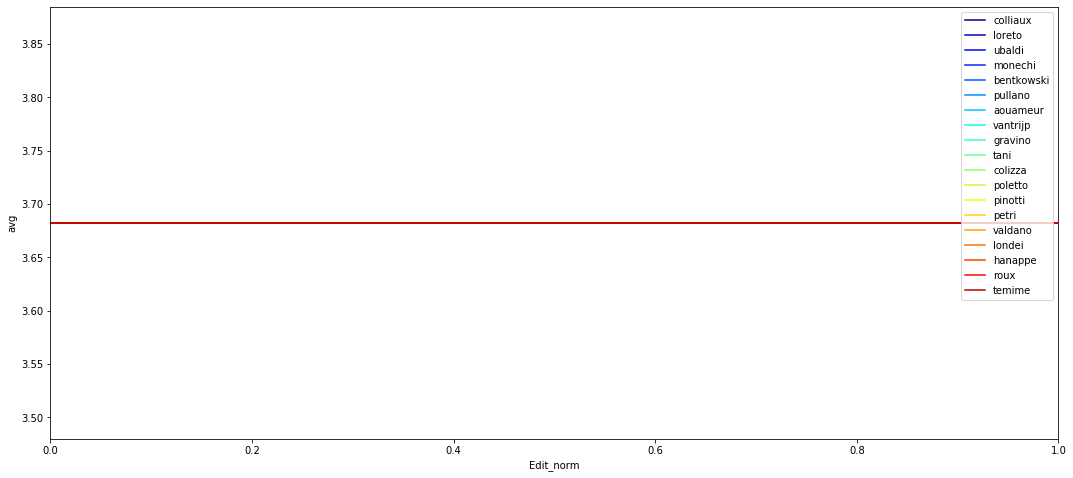

In [13]:
plot_sliding_prop(Data, 'avg')

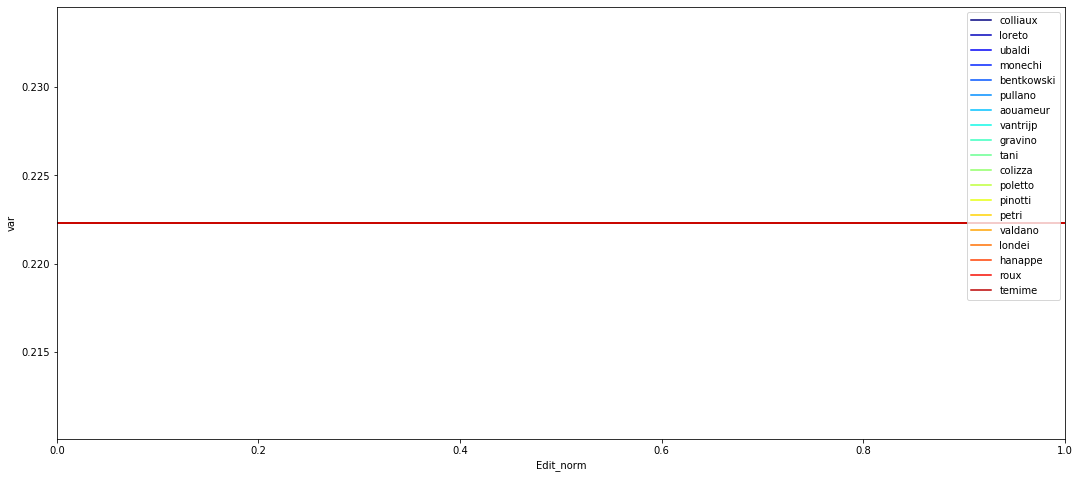

In [14]:
plot_sliding_prop(Data, 'var')

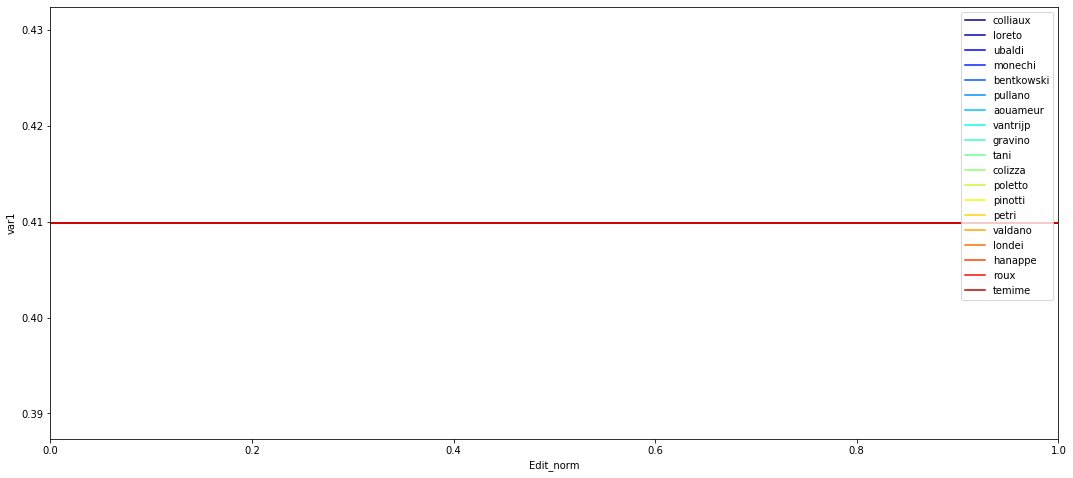

In [15]:
plot_sliding_prop(Data, 'var1')